# Project 1: Human Skin Detection

 Write a program that detects human skin areas using different color spaces. The output of the program should only include human skin areas and other areas should be removed as much as possible.

The ultimate goal of this exercise is an image similar to the image below:

The image above is taken from the article

Human Skin Detection Using RGB, HSV and YCbCr Color Models

which you can download from here.

The important part of this article is actually page 5, which lists the different conditions obtained for skin detection:

In the image of the article above, in addition to the BGR/RGB color space, the HSV and YCrCb color spaces are used.

For simplicity, omit the variable A, the other variables are the channels of the mentioned color spaces.

Note: In the article above, the numerical range for the S and V channels of the HSV color space is considered between 0 and 1, so before implementing the conditions, use the following command to compare these two channels and then apply the conditions.
S = S/255
V = V/255

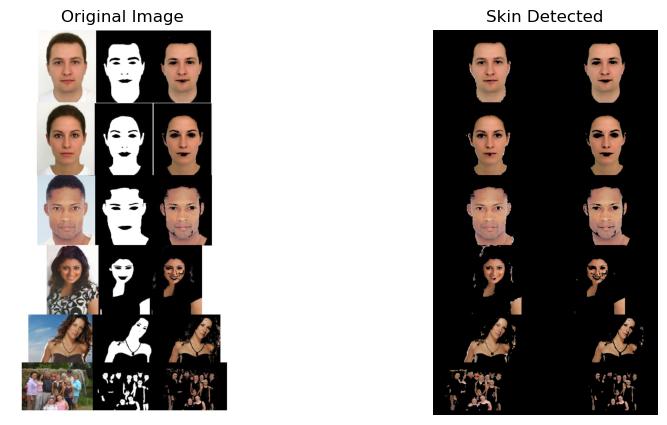

True

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = r'D:\exam\test\Project1-Human Skin Detection\Face-Images.jpg'  # Replace with the correct path to your image
image = cv2.imread(image_path)

# Check if the image was successfully loaded
if image is None:
    raise FileNotFoundError(f"Error: Could not load image at {image_path}. Please check the file path and ensure the image exists.")

# Convert image from BGR to RGB (since OpenCV loads in BGR format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert image to HSV color space
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Convert image to YCbCr color space
image_ycbcr = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

# Extract individual channels for RGB
R = image_rgb[:, :, 0]
G = image_rgb[:, :, 1]
B = image_rgb[:, :, 2]

# Extract individual channels for HSV
H = image_hsv[:, :, 0]  # Hue (0-180 in OpenCV)
S = image_hsv[:, :, 1]  # Saturation (0-255 in OpenCV)
V = image_hsv[:, :, 2]  # Value (0-255 in OpenCV)

# Normalize S and V to range [0, 1] as per the article
S = S / 255.0
V = V / 255.0

# Extract individual channels for YCbCr
Y = image_ycbcr[:, :, 0]
Cr = image_ycbcr[:, :, 1]
Cb = image_ycbcr[:, :, 2]

# Condition 1: HSV and RGB
condition1 = (
    (H >= 0) & (H <= 50) &  # Hue range adjusted for OpenCV (0-180 instead of 0-360)
    (S >= 0.23) & (S <= 0.68) &
    (R > 95) & (G > 40) & (B > 20) &
    (R > G) & (R > B) &
    (np.abs(R - G) > 15)
)

# Condition 2: RGB and YCbCr
condition2 = (
    (R > 95) & (G > 40) & (B > 20) &
    (R > G) & (R > B) &
    (np.abs(R - G) > 15) &
    (Cr > 135) & (Cb > 85) & (Y > 80) &
    (Cr <= (1.5862 * Cb) + 20) &
    (Cr >= (0.3448 * Cb) + 76.2069) &
    (Cr >= (-4.5652 * Cb) + 234.5652) &
    (Cr <= (-1.15 * Cb) + 301.75) &
    (Cr <= (-2.2857 * Cb) + 432.85)
)

# Combine conditions (OR operation)
skin_mask = (condition1 | condition2).astype(np.uint8) * 255

# Apply the mask to the original image to keep only skin regions
result = cv2.bitwise_and(image, image, mask=skin_mask)

# Convert result back to RGB for display with matplotlib
result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

# Display the original and the result
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')
plt.subplot(122)
plt.imshow(result_rgb)
plt.title("Skin Detected")
plt.axis('off')
plt.show()

# Save the result
cv2.imwrite('skin_detected_image.jpg', result)